In [26]:
#eda
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [28]:
df = pd.read_csv("cleaned_uk_stations_enriched.csv")
# Create folder to save EDA plots
os.makedirs("eda_plots", exist_ok=True)

sns.set(style="whitegrid")


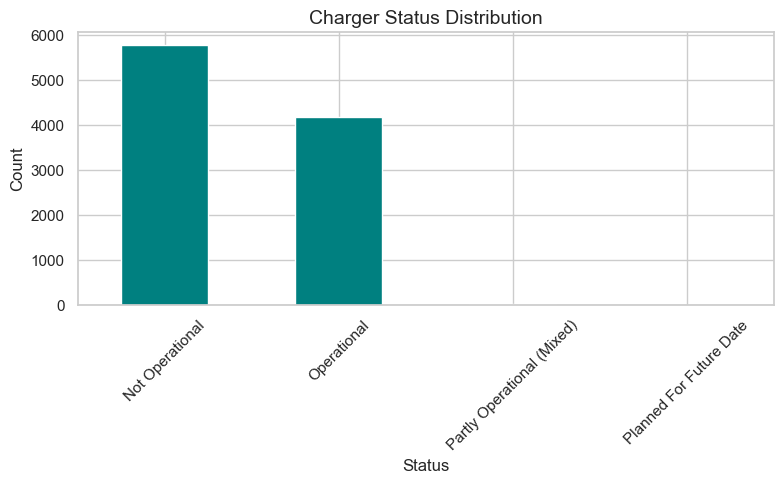

In [31]:
# 1. STATUS DISTRIBUTION

plt.figure(figsize=(8,5))
df['status'].value_counts().plot(kind='bar', color='teal')
plt.title("Charger Status Distribution", fontsize=14)
plt.xlabel("Status"); plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("eda_plots/status_distribution.png", dpi=300)
plt.show()

/var/folders/ct/gz423d997hq7k61yg40btdv40000gn/T/ipykernel_14306/284847190.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ops.values, y=top_ops.index, palette="Blues_r")


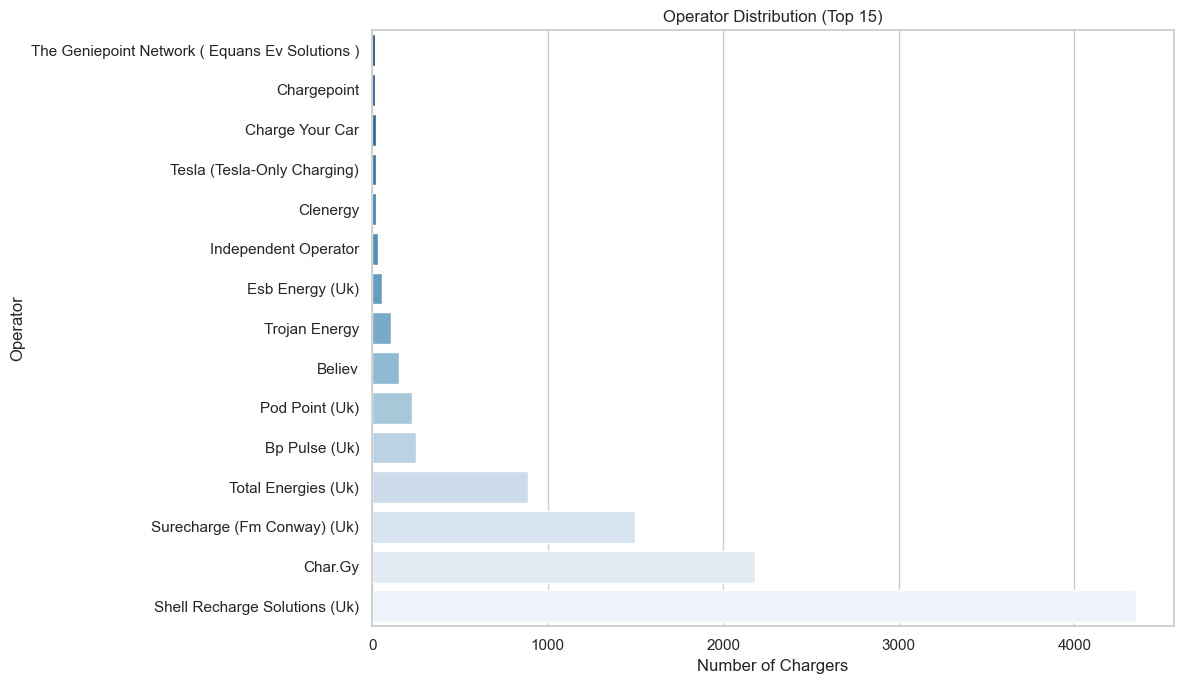

In [67]:
# OPERATOR DISTRIBUTION (TOP 15)


plt.figure(figsize=(12,7))
top_ops = df["operator"].value_counts().head(15).sort_values()

sns.barplot(x=top_ops.values, y=top_ops.index, palette="Blues_r")
plt.xlabel("Number of Chargers")
plt.ylabel("Operator")
plt.title("Operator Distribution (Top 15)")
plt.tight_layout()
plt.savefig("eda_plots/operator_distribution_top15.png", dpi=300)
plt.show()

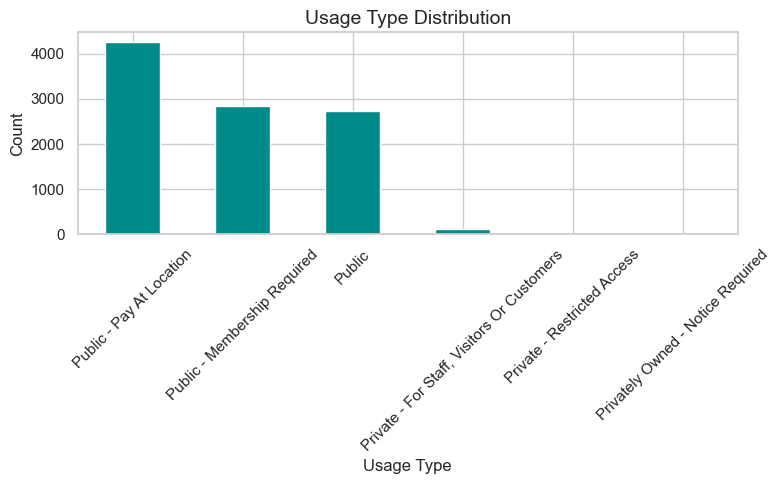

In [33]:
# 3) Usage type distribution

plt.figure(figsize=(8,5))
df['usage_type'].value_counts().plot(kind='bar', color='darkcyan')
plt.title("Usage Type Distribution", fontsize=14)
plt.xlabel("Usage Type"); plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("eda_plots/usage_type_distribution.png", dpi=300)
plt.show()

/var/folders/ct/gz423d997hq7k61yg40btdv40000gn/T/ipykernel_14306/3870452894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_boroughs.values, y=top20_boroughs.index, palette="viridis")


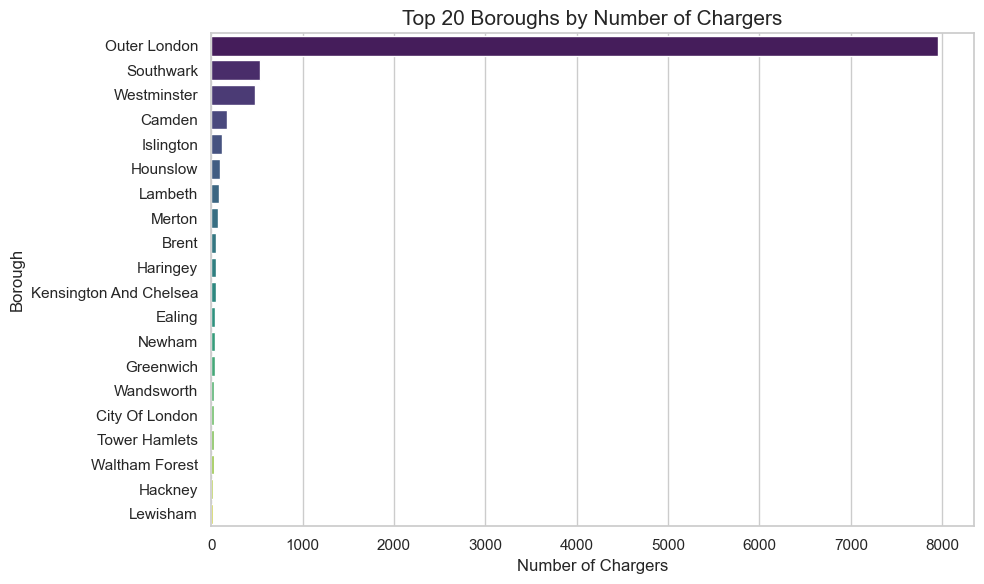

In [59]:
# 4. CHARGERS PER BOROUGH (TOP 20)

top20_boroughs = df['borough'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top20_boroughs.values, y=top20_boroughs.index, palette="viridis")
plt.title("Top 20 Boroughs by Number of Chargers", fontsize=15)
plt.xlabel("Number of Chargers"); plt.ylabel("Borough")
plt.tight_layout()
plt.savefig("eda_plots/chargers_per_borough_top20.png", dpi=300)
plt.show()



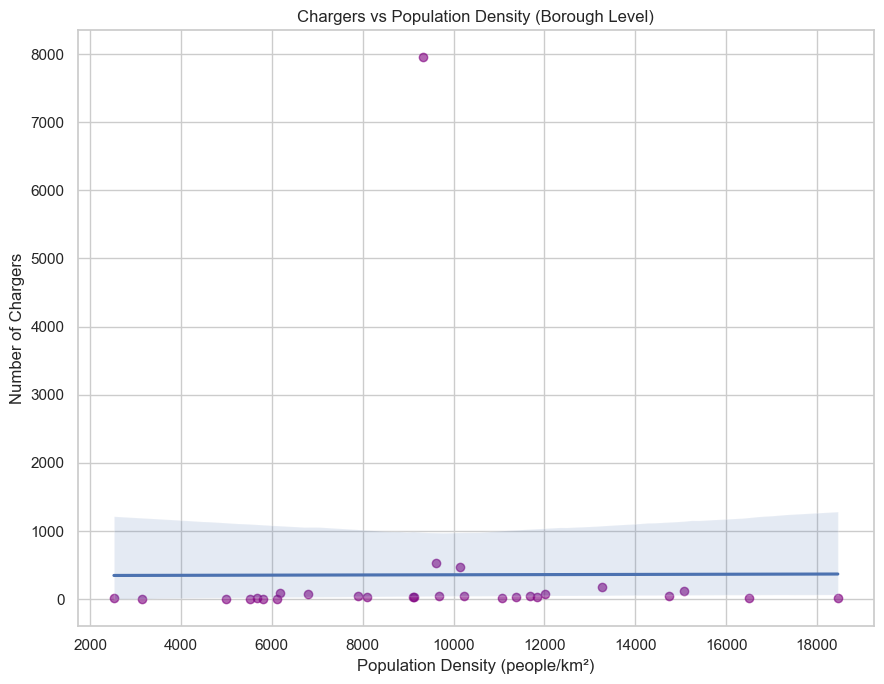

In [70]:
# 5) Chargers vs Population Density (Borough Level)


# Group borough data
b = df.groupby("borough").agg(
    chargers=("ocm_id", "count"),
    pop_dens=("borough_density_km2", "mean")
).reset_index()

# Create plot
plt.figure(figsize=(9,7))
sns.regplot(
    data=b, x="pop_dens", y="chargers",
    scatter_kws=dict(alpha=0.6, color="purple")
)

plt.xlabel("Population Density (people/km²)")
plt.ylabel("Number of Chargers")
plt.title("Chargers vs Population Density (Borough Level)")

# Save + Show
plt.tight_layout()
plt.savefig("eda_plots/chargers_vs_population_density.png", dpi=300)
plt.show()


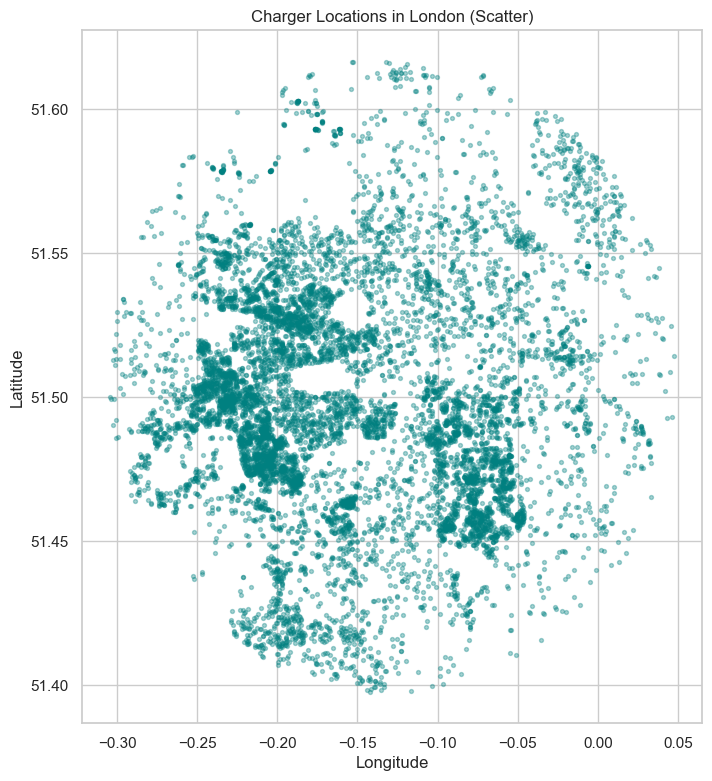

In [72]:
# 6) Map-like scatter of locations

plt.figure(figsize=(8,9))
plt.scatter(df["longitude"], df["latitude"], s=8, alpha=0.35, color="teal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Charger Locations in London (Scatter)")
plt.show("06_map_scatter_locations")


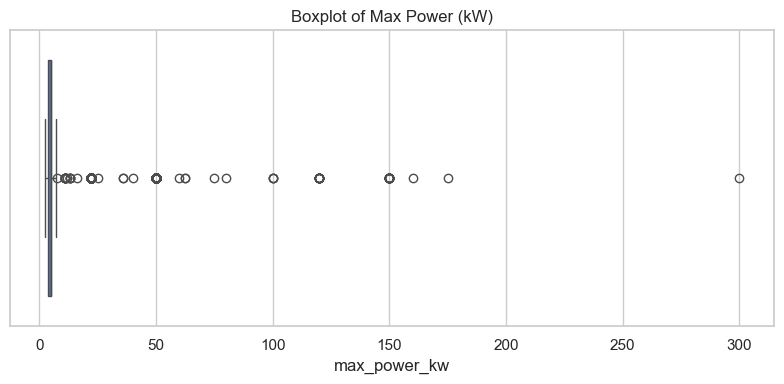

In [76]:
# 7) Max power distribution (+ boxplot)

plt.figure(figsize=(8,4))
sns.boxplot(x=df['max_power_kw'])
plt.title("Boxplot of Max Power (kW)")
plt.tight_layout()
plt.savefig("eda_plots/max_power_boxplot.png", dpi=300)
plt.show()



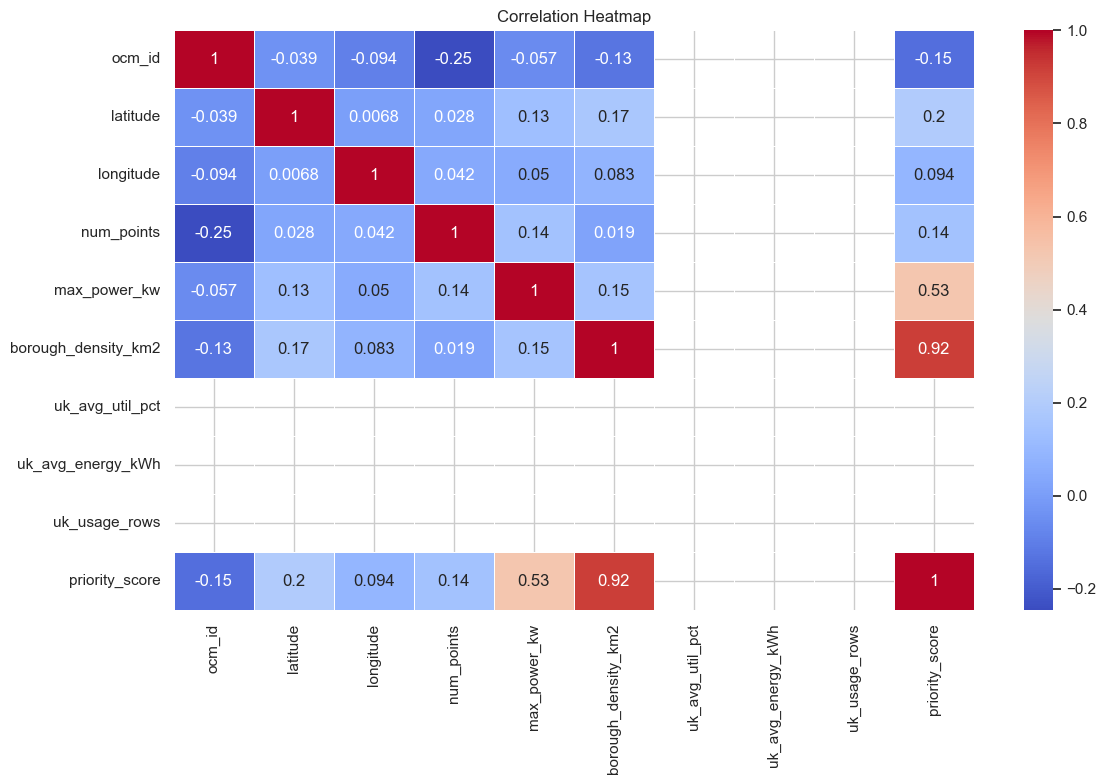

In [42]:
# 8) Correlation heatmap (key numeric variables)

numeric_cols = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("eda_plots/correlation_heatmap.png", dpi=300)
plt.show()



In [91]:
df['uk_usage_rows']

0       78
1       78
2       78
3       78
4       78
        ..
9995    78
9996    78
9997    78
9998    78
9999    78
Name: uk_usage_rows, Length: 10000, dtype: int64

Columns used for heatmap: ['ocm_id', 'latitude', 'longitude', 'num_points', 'max_power_kw', 'borough_density_km2', 'priority_score']


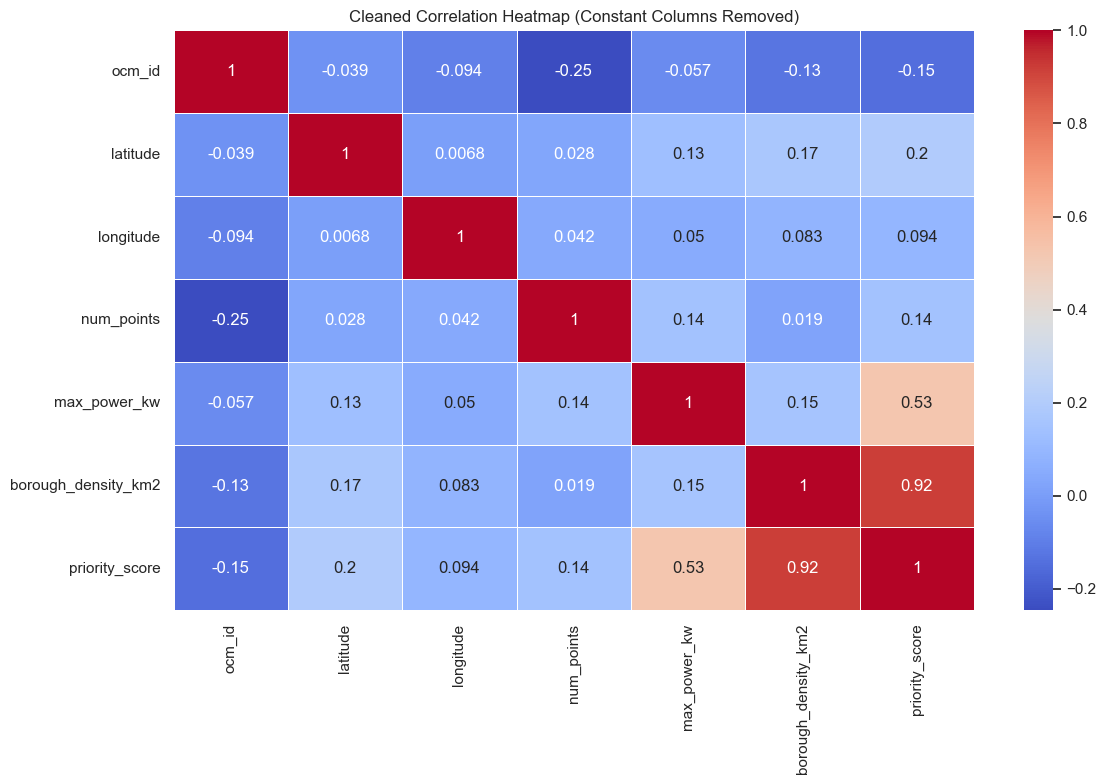

In [87]:
# NEW CORRELATION HEATMAP
# AUTO-REMOVE CONSTANT COLUMNS
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Remove columns where all values are the same
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

print("Columns used for heatmap:", numeric_df.columns.tolist())

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Cleaned Correlation Heatmap (Constant Columns Removed)")
plt.tight_layout()

# Save the heatmap
plt.savefig("eda_plots/new_correlation_heatmap.png", dpi=300)
plt.show()


/var/folders/ct/gz423d997hq7k61yg40btdv40000gn/T/ipykernel_14306/3698183796.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_priority, x="borough", y="priority_score", palette="viridis")


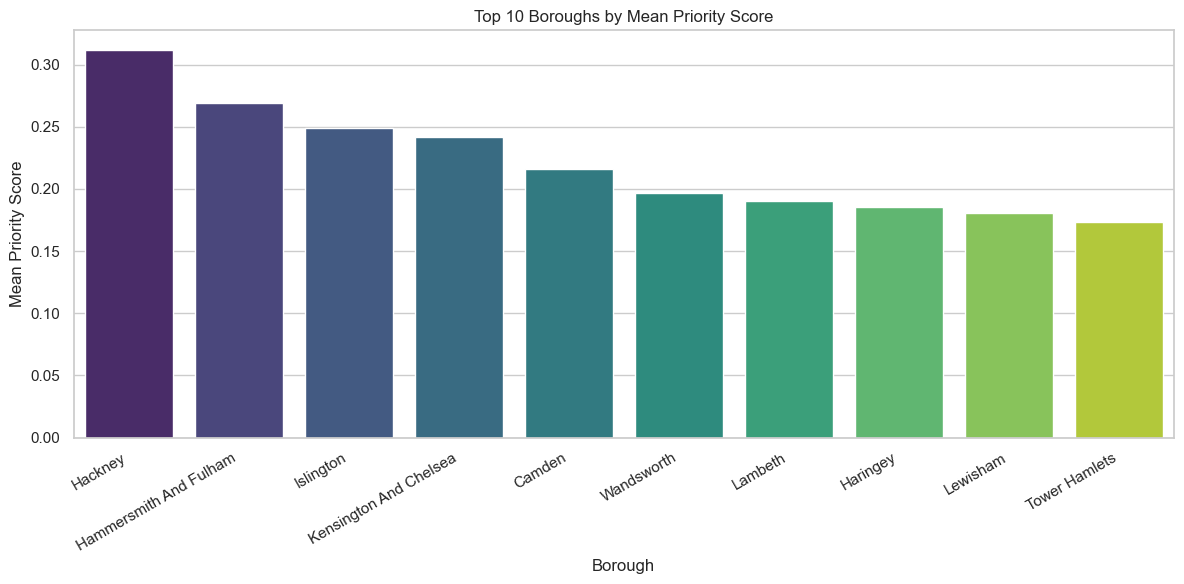

In [78]:
# 9) Top 10 Boroughs by Mean Priority Score


# Group & sort
top_priority = (
    df.groupby("borough", as_index=False)["priority_score"]
      .mean()
      .sort_values("priority_score", ascending=False)
      .head(10)
)

# Create plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_priority, x="borough", y="priority_score", palette="viridis")

plt.xticks(rotation=30, ha="right")
plt.ylabel("Mean Priority Score")
plt.xlabel("Borough")
plt.title("Top 10 Boroughs by Mean Priority Score")

# Save and show
plt.tight_layout()
plt.savefig("eda_plots/top10_boroughs_mean_priority_score.png", dpi=300)
plt.show()


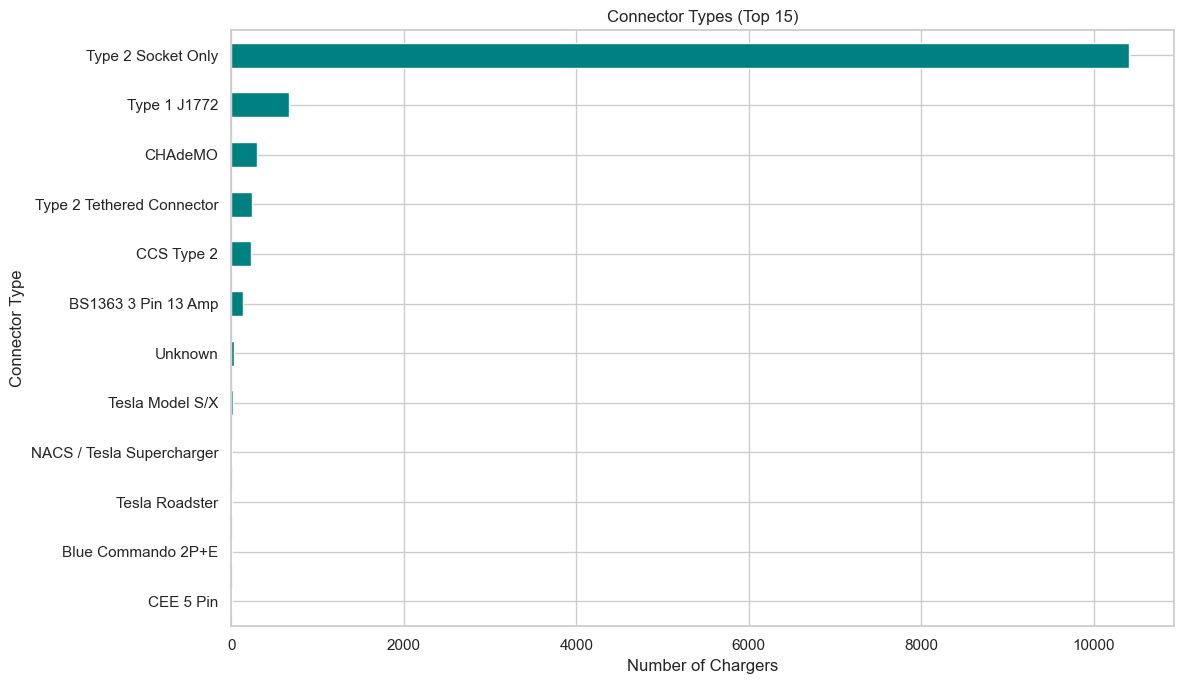

In [82]:
# 10)CONNECTOR TYPES (TOP 15)

# Step 1 — Clean and split connector strings
conn_series = (
    df["connector_types"]
      .fillna("Unknown")
      .astype(str)
      .str.replace(r"[\[\]\(\)]", "", regex=True)   # remove brackets
      .str.replace("|", ",", regex=False)           # replace pipe with commas
      .str.replace(";", ",", regex=False)           # replace semicolons with commas
      .str.split(",")                               # split into list
)

# Step 2 — Flatten lists into a single column
conn_flat = pd.Series(
    [c.strip() for sub in conn_series for c in sub if str(c).strip() != ""],
    name="connector"
)

# Step 3 — Normalize common connector name variants
conn_flat = conn_flat.replace({
    "": "Unknown",
    "Type 2": "Type2",
    "Type-2": "Type2",
    "type2": "Type2",
    "TYPE2": "Type2",
})

# Step 4 — Compute top 15 connector types
top_connectors = conn_flat.value_counts().head(15).sort_values()

# Step 5 — Plot
plt.figure(figsize=(12,7))
top_connectors.plot(kind="barh", color="teal")

plt.xlabel("Number of Chargers")
plt.ylabel("Connector Type")
plt.title("Connector Types (Top 15)")

# Save and show
plt.tight_layout()
plt.savefig("eda_plots/connector_types_top15.png", dpi=300)
plt.show()


In [87]:
!pip install folium


In [89]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Prepare lat/lon & an optional weight (normalized power)
latlon = df[["latitude","longitude","max_power_kw"]].copy()
latlon = latlon.dropna(subset=["latitude","longitude"])
latlon["w"] = (pd.to_numeric(latlon["max_power_kw"], errors="coerce")
               .fillna(latlon["max_power_kw"].median()))
# normalize weights to [0,1] for nicer heat intensity
if latlon["w"].max() > 0:
    latlon["w"] = (latlon["w"] - latlon["w"].min()) / (latlon["w"].max() - latlon["w"].min())
else:
    latlon["w"] = 0.5

# Map center = median coordinates
center = [latlon["latitude"].median(), latlon["longitude"].median()]
m = folium.Map(location=center, zoom_start=11, tiles="cartodbpositron")

# Add heat layer
HeatMap(latlon[["latitude","longitude","w"]].values.tolist(),
        radius=10, blur=15, max_zoom=13).add_to(m)

# Save & display
html_path = OUTDIR / "heatmap_stations.html"
m.save(str(html_path))
print(f"✅ Saved → {html_path}")
display(m)


✅ Saved → eda_plots/heatmap_stations.html


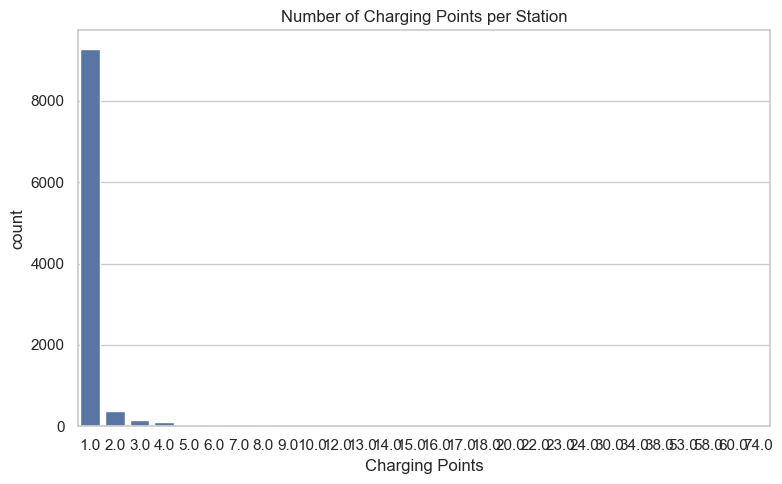

In [57]:
# 6. NUM_POINTS DISTRIBUTION

plt.figure(figsize=(8,5))
sns.countplot(x=df["num_points"])
plt.title("Number of Charging Points per Station")
plt.xlabel("Charging Points")
plt.tight_layout()
plt.savefig("eda_plots/num_points_distribution.png", dpi=300)
plt.show()
